In [1]:
import pandas as pd
loans = pd.read_csv("../_datasets/loan_clean.csv")
y = loans["percent_funded"] > 95
X = loans.drop("percent_funded", axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
  X, y,
  test_size=0.2,  # testing fraction
  shuffle=True,
  random_state=302
)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=9)

knn.fit(X_train, y_train)     # fit only to training set
print(f"test accuracy is {knn.score(X_test, y_test):.2%}")

test accuracy is 95.67%


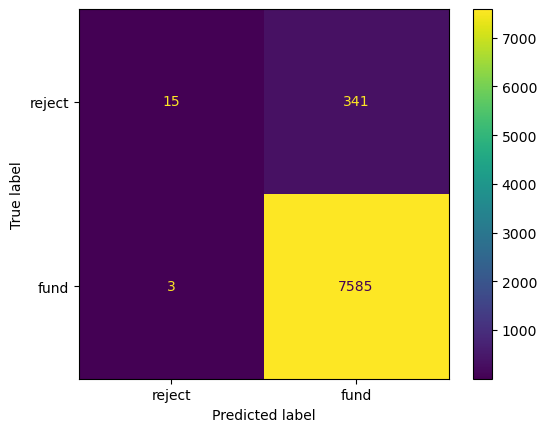

In [2]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
yhat = knn.predict(X_test)
C = confusion_matrix(y_test, yhat, labels=[False, True])
lbl = ["reject", "fund"]
ConfusionMatrixDisplay(C, display_labels=lbl).plot();

In [3]:
(7585 + 15) / (7585 + 3 + 341 + 15)

0.9566968781470292

In [4]:
from sklearn.metrics import precision_score, recall_score

recall = recall_score(y_test, yhat, pos_label=True)
precision = precision_score(y_test, yhat, pos_label=True) 
specificity = recall_score(y_test, yhat, pos_label=False)
print(f"recall is {recall:.1%}, precision is {precision:.1%}, and specificity is {specificity:.1%}")

recall is 100.0%, precision is 95.7%, and specificity is 4.2%


In [5]:
from sklearn.metrics import f1_score, balanced_accuracy_score

print( f"F1 = {f1_score(y_test, yhat):.1%}" )
print( f"balanced accuracy = {balanced_accuracy_score(y_test, yhat):.1%}" )

F1 = 97.8%
balanced accuracy = 52.1%
